# <u><center>Product Sentiment Analysis</center></u>

In [1]:
#pip install selenium

In [2]:
from selenium import webdriver
import pandas as pd
import warnings
from selenium.webdriver.support.select import Select
warnings.filterwarnings('ignore')

### <u><center>Mobile Phones Review Collection from Flipkart website</center></u>

In [3]:
path = "C:/Users/chira/Downloads/chromedriver.exe"
driver = webdriver.Chrome(executable_path=path)
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="c70d8bc426b3ad069113080de8b2b1fb")>

In [4]:
mobile_url_link = ["https://www.flipkart.com/apple-iphone-11-black-64-gb-includes-earpods-power-adapter/product-reviews/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace=FLIPKART",
                  "https://www.flipkart.com/oneplus-u1s-164-cm-65-inch-ultra-hd-4k-led-smart-android-tv/product-reviews/itm8625fe03919f2?pid=TVSG3E9A3MNZUTQK&lid=LSTTVSG3E9A3MNZUTQK20TZNG&marketplace=FLIPKART",
                  "https://www.flipkart.com/redmi-9-sporty-orange-64-gb/product-reviews/itm4fb151383983b?pid=MOBFV5FPCJC9ZKRB&lid=LSTMOBFV5FPCJC9ZKRBPIPCPK&marketplace=FLIPKART",
                  "https://www.flipkart.com/motorola-g32-mineral-gray-64-gb/product-reviews/itmdcfa4c4022714?pid=MOBGEA3CZ8Z7HWCY&lid=LSTMOBGEA3CZ8Z7HWCYPHBSGA&aid=overall&certifiedBuyer=false&sortOrder=NEGATIVE_FIRST"]

In [5]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [6]:
#scrapping data from first 60 pages
def scrap_mobile_data(reviews, ratings):
    for i in range(60):
        try : 
            #locating review webelement using XPATH
            r = driver.find_elements(By.XPATH, "//div[@class='col _2wzgFH K0kLPL']")

            #storing review and rating 
            for r in review:
                li = r.text.split('\n')
                reviews.append(li[1])
                ratings.append(li[0]) 
            
            #next page
            wait = WebDriverWait(driver, 10)
            wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"NEXT"))).click()

        except TimeoutException :
            break

In [7]:
reviews=[]
ratings=[]
l = len(mobile_url_link)
for i in range(l):
    driver.get(mobile_url_link[i])
    scrap_mobile_data(reviews, ratings)
    
#converting into dataframe
df = pd.DataFrame({'Reviews':reviews, 'Rating':ratings})

In [8]:
#saving in csv
df.to_csv("ReviewsDataSet1.csv", index = False)

#### **Importing requires libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import string
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize
nltk.download('punkt')


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("ReviewsDataSet1.csv")
df.shape

(2000, 2)

In [13]:
df.columns

Index(['Reviews', 'Rating'], dtype='object')

In [14]:
df.dtypes

Reviews    object
Rating      int64
dtype: object

In [15]:
df.reset_index(inplace = True, drop = True)

In [16]:
df['Sentiment'] = df['Rating'].map({5: "Positive", 1: "Negative", 2: "Negative", 3: "Neutral", 4: "Positive"})
df.head()

,Reviews,Rating,Sentiment
0,Fair,3,Neutral
1,Brilliant,5,Positive
2,Mind-blowing purchase,5,Positive
3,Wonderful,5,Positive
4,Does the job,3,Neutral


In [17]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [18]:
df.drop(["Rating"], axis = 1, inplace = True)
df.head()

,Reviews,Sentiment
0,Fair,Neutral
1,Brilliant,Positive
2,Mind-blowing purchase,Positive
3,Wonderful,Positive
4,Does the job,Neutral


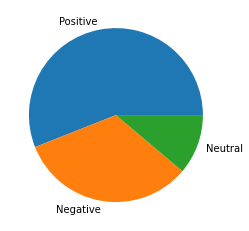

In [19]:
plt.pie(df.Sentiment.value_counts().values, labels = df.Sentiment.value_counts().index)
plt.show()

Positive    1120
Negative     657
Neutral      223
Name: Sentiment, dtype: int64

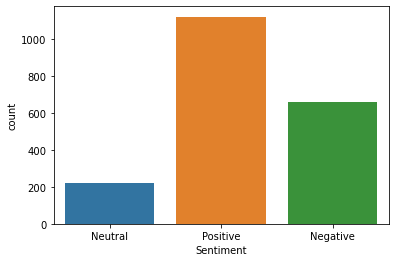

In [20]:
sns.countplot(x = 'Sentiment', data = df)
df['Sentiment'].value_counts()

## <u><center>Text Pre-processing</center></u>

#### tokenization -> lowering + stopwords and punctuation removal -> lemmatization

In [21]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)

# object for lemmatizer
lemmatizer = WordNetLemmatizer()

#removing 'not' from stop words
stops.remove('not')

In [22]:
if 'not' not in stops:
    print(True)

True


#### Cleaning Reviews

In [23]:
# function to clean each tweets

def clean_tweet(text):
    words = word_tokenize(text)
    
    # Created empty a list to store the clean tweet words
    output_words = []
    
    # traversing through each word, Ignoring the stopwords, punctuations, Checking whether word contains only alphabets?
    for w in words:
        
        if w.lower() not in stops and w.lower().isalpha():
            # applying lemmatizer 
            clean_word = lemmatizer.lemmatize(w)
            output_words.append(clean_word.lower())
            
    #clean_sentence = [" ".join(w) for w in output_words]
    clean_sentence = " ".join(output_words) 
    
    return clean_sentence

In [24]:
df['Reviews'] = pd.DataFrame(df['Reviews'].apply(clean_tweet))

In [25]:
df.head()

,Reviews,Sentiment
0,fair,Neutral
1,brilliant,Positive
2,purchase,Positive
3,wonderful,Positive
4,job,Neutral


In [26]:
X = df["Reviews"]
y = df['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

## <u><center>Feature Extraction</center></u>
#### **Tfidf Vectorizer**

In [27]:
tfid_vec = TfidfVectorizer(max_features=1000)

X_train_transformed = tfid_vec.fit_transform(X_train)
X_test_transformed = tfid_vec.transform(X_test)

# summarize
print(tfid_vec.vocabulary_)

{'waste': 61, 'money': 36, 'classy': 11, 'product': 47, 'utterly': 60, 'disappointed': 16, 'perfect': 43, 'fabulous': 24, 'wow': 68, 'worst': 65, 'experience': 23, 'ever': 17, 'not': 39, 'meet': 34, 'expectation': 20, 'excellent': 19, 'unsatisfactory': 58, 'worth': 66, 'super': 55, 'good': 26, 'quality': 49, 'wonderful': 64, 'useless': 59, 'job': 32, 'delightful': 15, 'great': 27, 'awesome': 1, 'brilliant': 8, 'okay': 40, 'hated': 28, 'fair': 25, 'choice': 10, 'purchase': 48, 'every': 18, 'penny': 42, 'worthless': 67, 'best': 4, 'market': 33, 'absolute': 0, 'rubbish': 52, 'must': 37, 'buy': 9, 'horrible': 30, 'could': 13, 'way': 62, 'better': 5, 'terrific': 57, 'nice': 38, 'simply': 53, 'highly': 29, 'recommended': 51, 'pretty': 46, 'terrible': 56, 'bad': 2, 'decent': 14, 'poor': 45, 'expected': 21, 'moderate': 35, 'really': 50, 'well': 63, 'balanced': 3, 'phone': 44, 'slightly': 54, 'bit': 6, 'expensive': 22, 'oppo': 41, 'brand': 7, 'connectivity': 12, 'issue': 31}


In [28]:
tfid_vec.get_feature_names()

['absolute',
 'awesome',
 'bad',
 'balanced',
 'best',
 'better',
 'bit',
 'brand',
 'brilliant',
 'buy',
 'choice',
 'classy',
 'connectivity',
 'could',
 'decent',
 'delightful',
 'disappointed',
 'ever',
 'every',
 'excellent',
 'expectation',
 'expected',
 'expensive',
 'experience',
 'fabulous',
 'fair',
 'good',
 'great',
 'hated',
 'highly',
 'horrible',
 'issue',
 'job',
 'market',
 'meet',
 'moderate',
 'money',
 'must',
 'nice',
 'not',
 'okay',
 'oppo',
 'penny',
 'perfect',
 'phone',
 'poor',
 'pretty',
 'product',
 'purchase',
 'quality',
 'really',
 'recommended',
 'rubbish',
 'simply',
 'slightly',
 'super',
 'terrible',
 'terrific',
 'unsatisfactory',
 'useless',
 'utterly',
 'waste',
 'way',
 'well',
 'wonderful',
 'worst',
 'worth',
 'worthless',
 'wow']

## <u><center>Model Building</center></u>

#### <u><center> Random Forest Classifier, MultinomialNB, SVC</center></u>

In [29]:
rf = RandomForestClassifier()
svc = SVC()
mnb = MultinomialNB()
model = [ svc, mnb, rf]
model_name =[m for m in model]
model_name

[SVC(), MultinomialNB(), RandomForestClassifier()]

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
for m in model:
    m.fit(X_train_transformed, y_train)
    print(m, "score is", m.score(X_train_transformed, y_train))
    cs = cross_val_score(m, X_train_transformed , y_train, cv=5)
    print("cross vali: ",cs, " avg =>", cs.mean(), '\n')
    
    y_pred1 = m.predict(X_test_transformed)
    # accuracy
    print("accuracy : ", metrics.accuracy_score(y_test, y_pred1), end = ',   ')

    # precision
    print("F1 score : ", metrics.f1_score(y_test, y_pred1, average='weighted'))

    print('-'*50)

SVC() score is 0.9842857142857143
cross vali:  [0.98928571 0.99285714 0.98928571 0.97857143 0.96785714]  avg => 0.9835714285714285 

accuracy :  0.9783333333333334,   F1 score :  0.9785256336931503
--------------------------------------------------
MultinomialNB() score is 0.965
cross vali:  [0.975      0.94642857 0.97142857 0.96785714 0.96785714]  avg => 0.9657142857142856 

accuracy :  0.9666666666666667,   F1 score :  0.9654860802269767
--------------------------------------------------
RandomForestClassifier() score is 0.9842857142857143
cross vali:  [0.98928571 0.99285714 0.98928571 0.97857143 0.96785714]  avg => 0.9835714285714285 

accuracy :  0.9783333333333334,   F1 score :  0.9785256336931503
--------------------------------------------------


## svc is performing best so training model with svc

In [32]:
final_model = SVC()
final_model.fit(X_train_transformed , y_train)
y_pred1 = final_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    Negative       0.99      0.98      0.99       196
     Neutral       0.90      0.96      0.93        68
    Positive       0.99      0.98      0.98       336

    accuracy                           0.98       600
   macro avg       0.96      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600



## <u><center>Prediction on new Reviews</center></u>

In [33]:
reviews = [['Unsatisfactory , WASTE OF MONEY'],
          ['Good, Just okay!'],
          ['Highly recommended'],
          ['Did not meet expectations'],
          ['Very Good, Great product, Awesome'],
          ['Think before buying through flipkart']]

In [34]:
for i in range(6):
    print(reviews[i][0], '-'*10, "Prected as",'-'*20, final_model.predict(tfid_vec.transform(reviews[i])))
    print()

Unsatisfactory , WASTE OF MONEY ---------- Prected as -------------------- ['Negative']

Good, Just okay! ---------- Prected as -------------------- ['Neutral']

Highly recommended ---------- Prected as -------------------- ['Positive']

Did not meet expectations ---------- Prected as -------------------- ['Negative']

Very Good, Great product, Awesome ---------- Prected as -------------------- ['Positive']

Think before buying through flipkart ---------- Prected as -------------------- ['Positive']

